In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from datasets import naturalscenes
from torchsmodel import sparsecoding
from utils import plotmontage 
import torch
import time

### Define constants and load data

In [2]:
patch_size = 16
batch_size = 100
patch_overlap = 4 
device = torch.device('cuda')

gpudataset = naturalscenes(img_dir='data/IMAGES.mat',patch_size=patch_size,patch_overlap=patch_overlap,data_key='IMAGES',device=device)
cpudataset = naturalscenes(img_dir='data/IMAGES.mat',patch_size=patch_size,patch_overlap=patch_overlap,data_key='IMAGES')

### Visualize patches

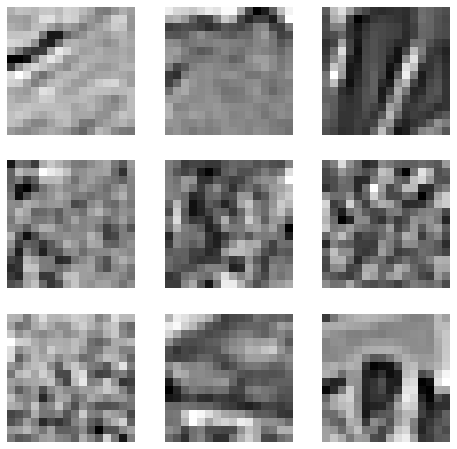

In [3]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(cpudataset), size=(1,)).item()
    img = cpudataset[sample_idx].numpy()
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze().reshape([patch_size,patch_size]), cmap="gray")
plt.show()

<IPython.core.display.Javascript object>


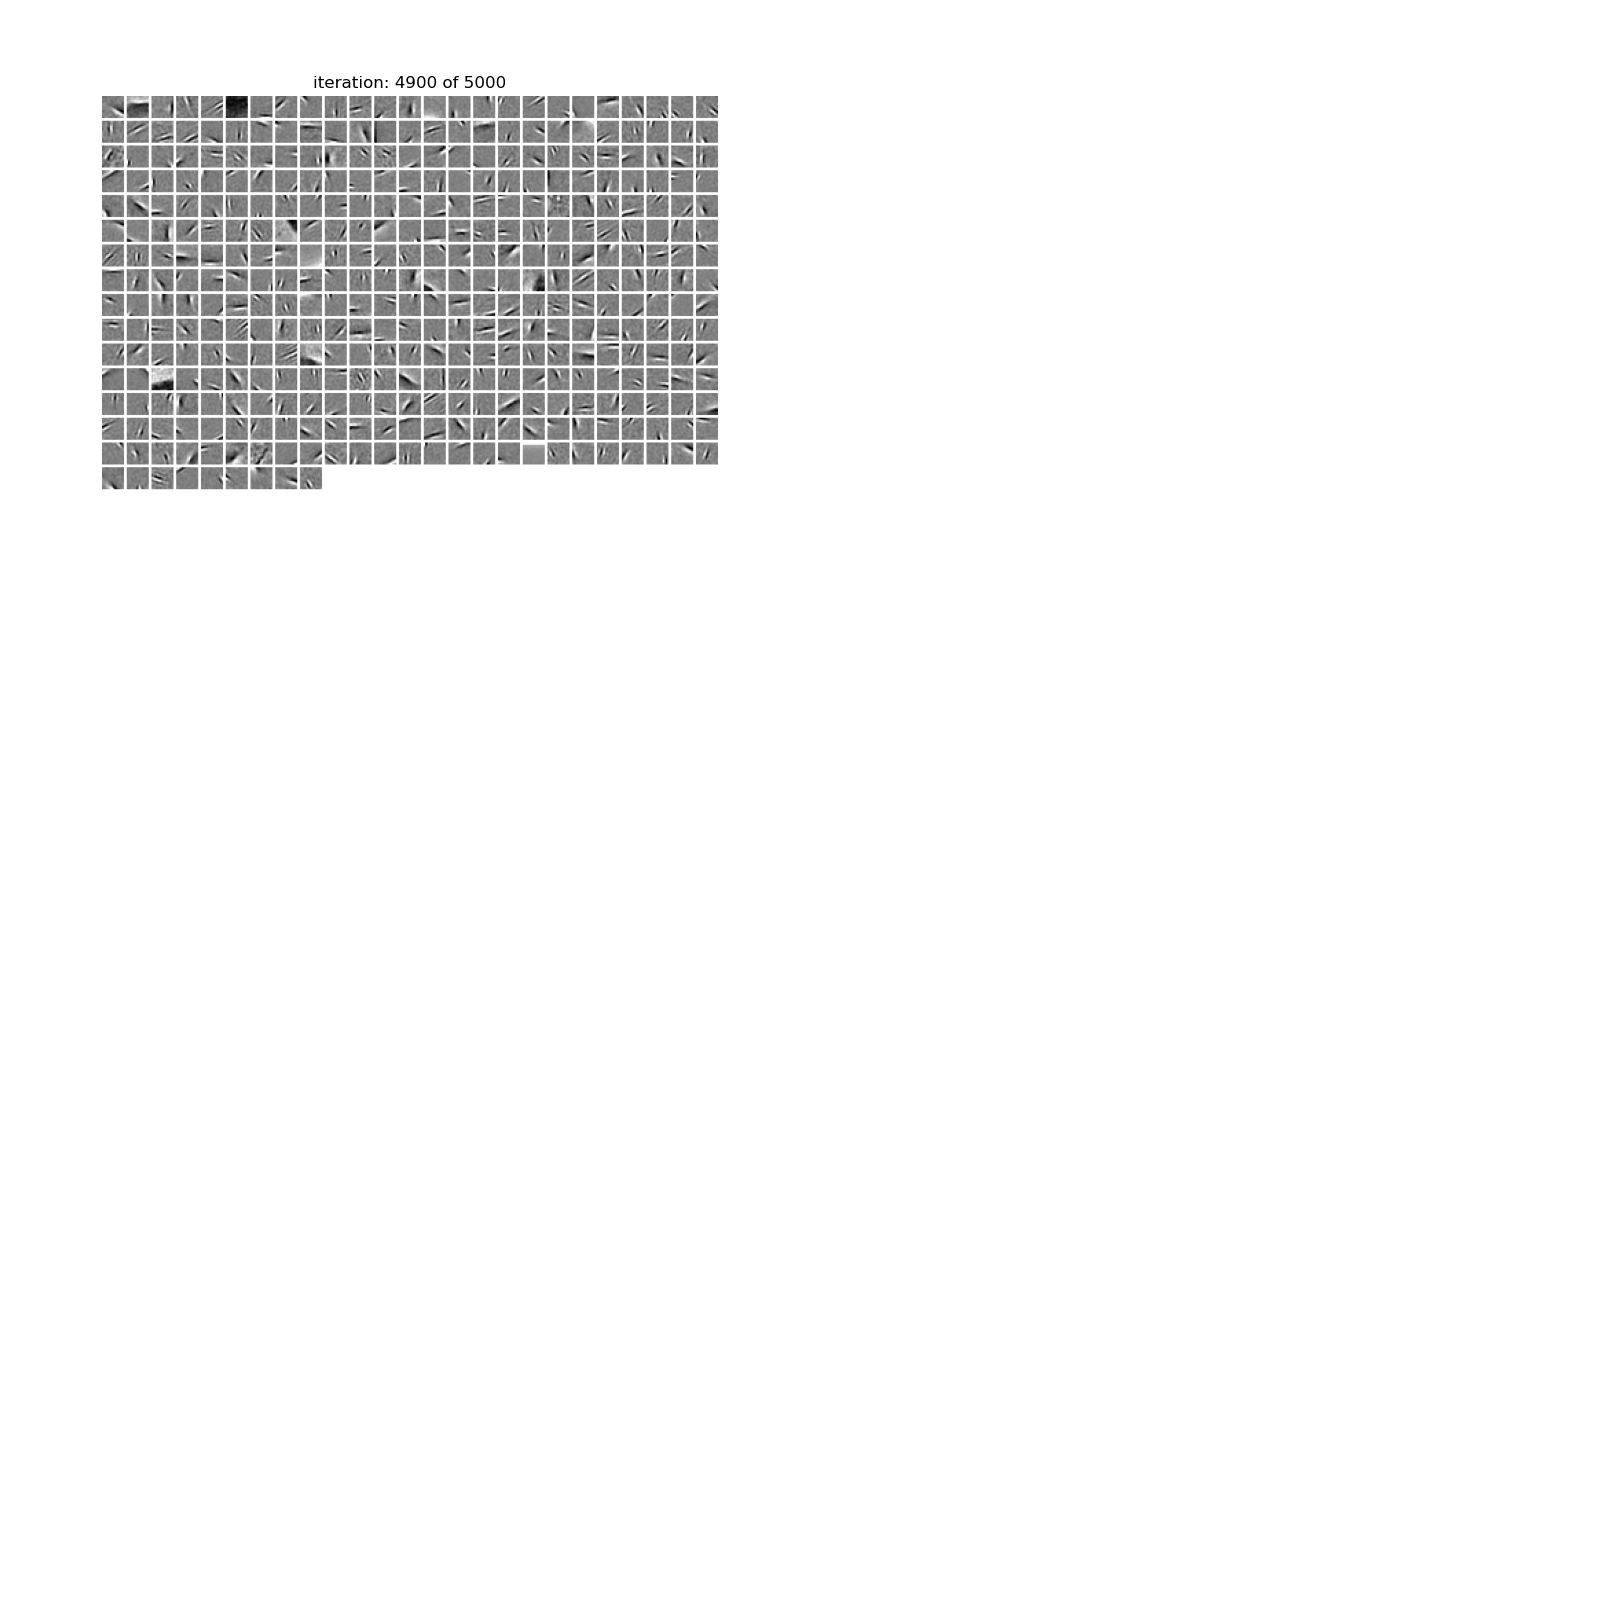

total time: 494.178282


In [17]:
%matplotlib notebook

n_basis   = 384
A_n_itr   = 300
lmbda     = 0.1
eta       = 5e-2
eps       = 1e-2
thresh    = 2e-1
nabla     = 5e-3

montage_update_rate = 50
n_epoch   = 5000

device = torch.device('cuda')
"""
model = sparsecoding(n_basis=n_basis,
                     n=patch_size**2,
                     lmbda=lmbda,
                     eta=eta,
                     eps=eps,
                     stop_early=False,
                     thresh=thresh,
                     nabla=nabla,
                     n_itr=A_n_itr,
                     device=device
                    )
"""
model.nabla = nabla 
model.eta = eta

fig,ax = plotmontage(model)
t0 = time.time()
for i in range(n_epoch//montage_update_rate):
    # learn dictionary
    model.learndict(gpudataset,n_epoch=montage_update_rate,batch_size=batch_size)
    # update montage
    fig,ax = plotmontage(model,fig=fig,ax=ax,title='iteration: %d of %d'%(i*montage_update_rate,n_epoch))
t1 = time.time()
fig,ax = plotmontage(model,fig=fig,ax=ax,title='iteration: %d of %d'%(n_epoch,n_epoch))
print('total time: %f'%(t1-t0))


In [19]:
# save dictionary

fname = "dictionaries/DICTIONARY_LCA_1.5x_overcomplete.p"
model.savedict(fname)

<IPython.core.display.Javascript object>


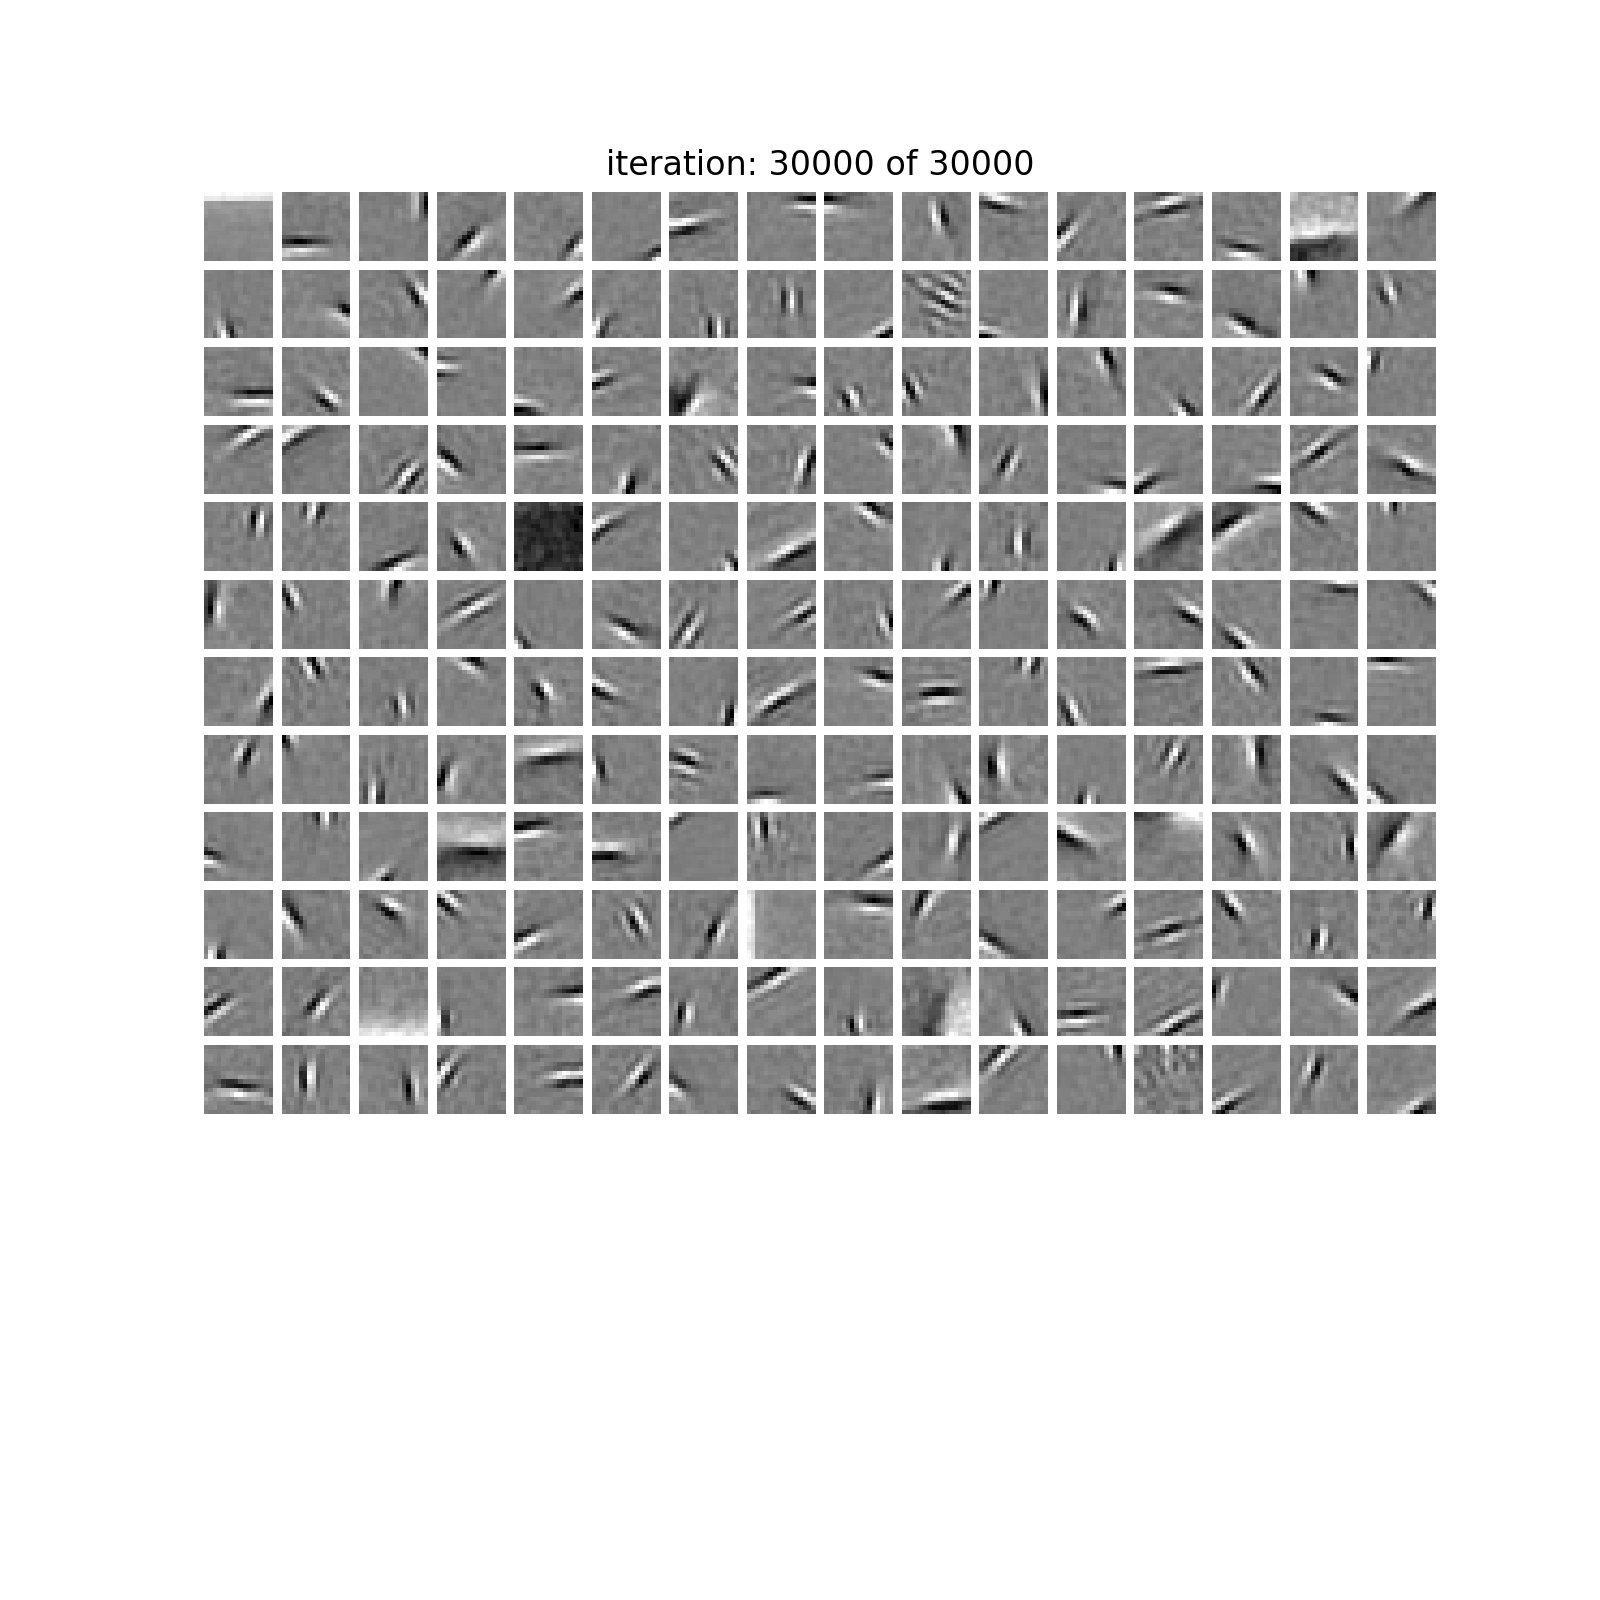

total time: 3013.512740


In [5]:
%matplotlib notebook

n_basis   = 192
A_n_itr   = 500
lmbda     = 0.1
eta       = 1e-1
eps       = 1e-2
thresh    = 2e-1
nabla     = 5e-3

montage_update_rate = 50
n_epoch   = 30000

device = torch.device('cuda')
model3 = sparsecoding(n_basis=n_basis,
                     n=patch_size**2,
                     lmbda=lmbda,
                     eta=eta,
                     eps=eps,
                     stop_early=False,
                     thresh=thresh,
                     nabla=nabla,
                     n_itr=A_n_itr,
                     device=device
                    )

fig,ax = plotmontage(model3)
t0 = time.time()
for i in range(n_epoch//montage_update_rate):
    # learn dictionary
    model3.learndict(gpudataset,n_epoch=montage_update_rate,batch_size=batch_size)
    # update montage
    fig,ax = plotmontage(model3,fig=fig,ax=ax,title='iteration: %d of %d'%(i*montage_update_rate,n_epoch))
t1 = time.time()
fig,ax = plotmontage(model3,fig=fig,ax=ax,title='iteration: %d of %d'%(n_epoch,n_epoch))
print('total time: %f'%(t1-t0))



In [6]:
fname = 'dictionaries/DICTIONARY_LCA.p'
model3.savedict(fname)

<IPython.core.display.Javascript object>


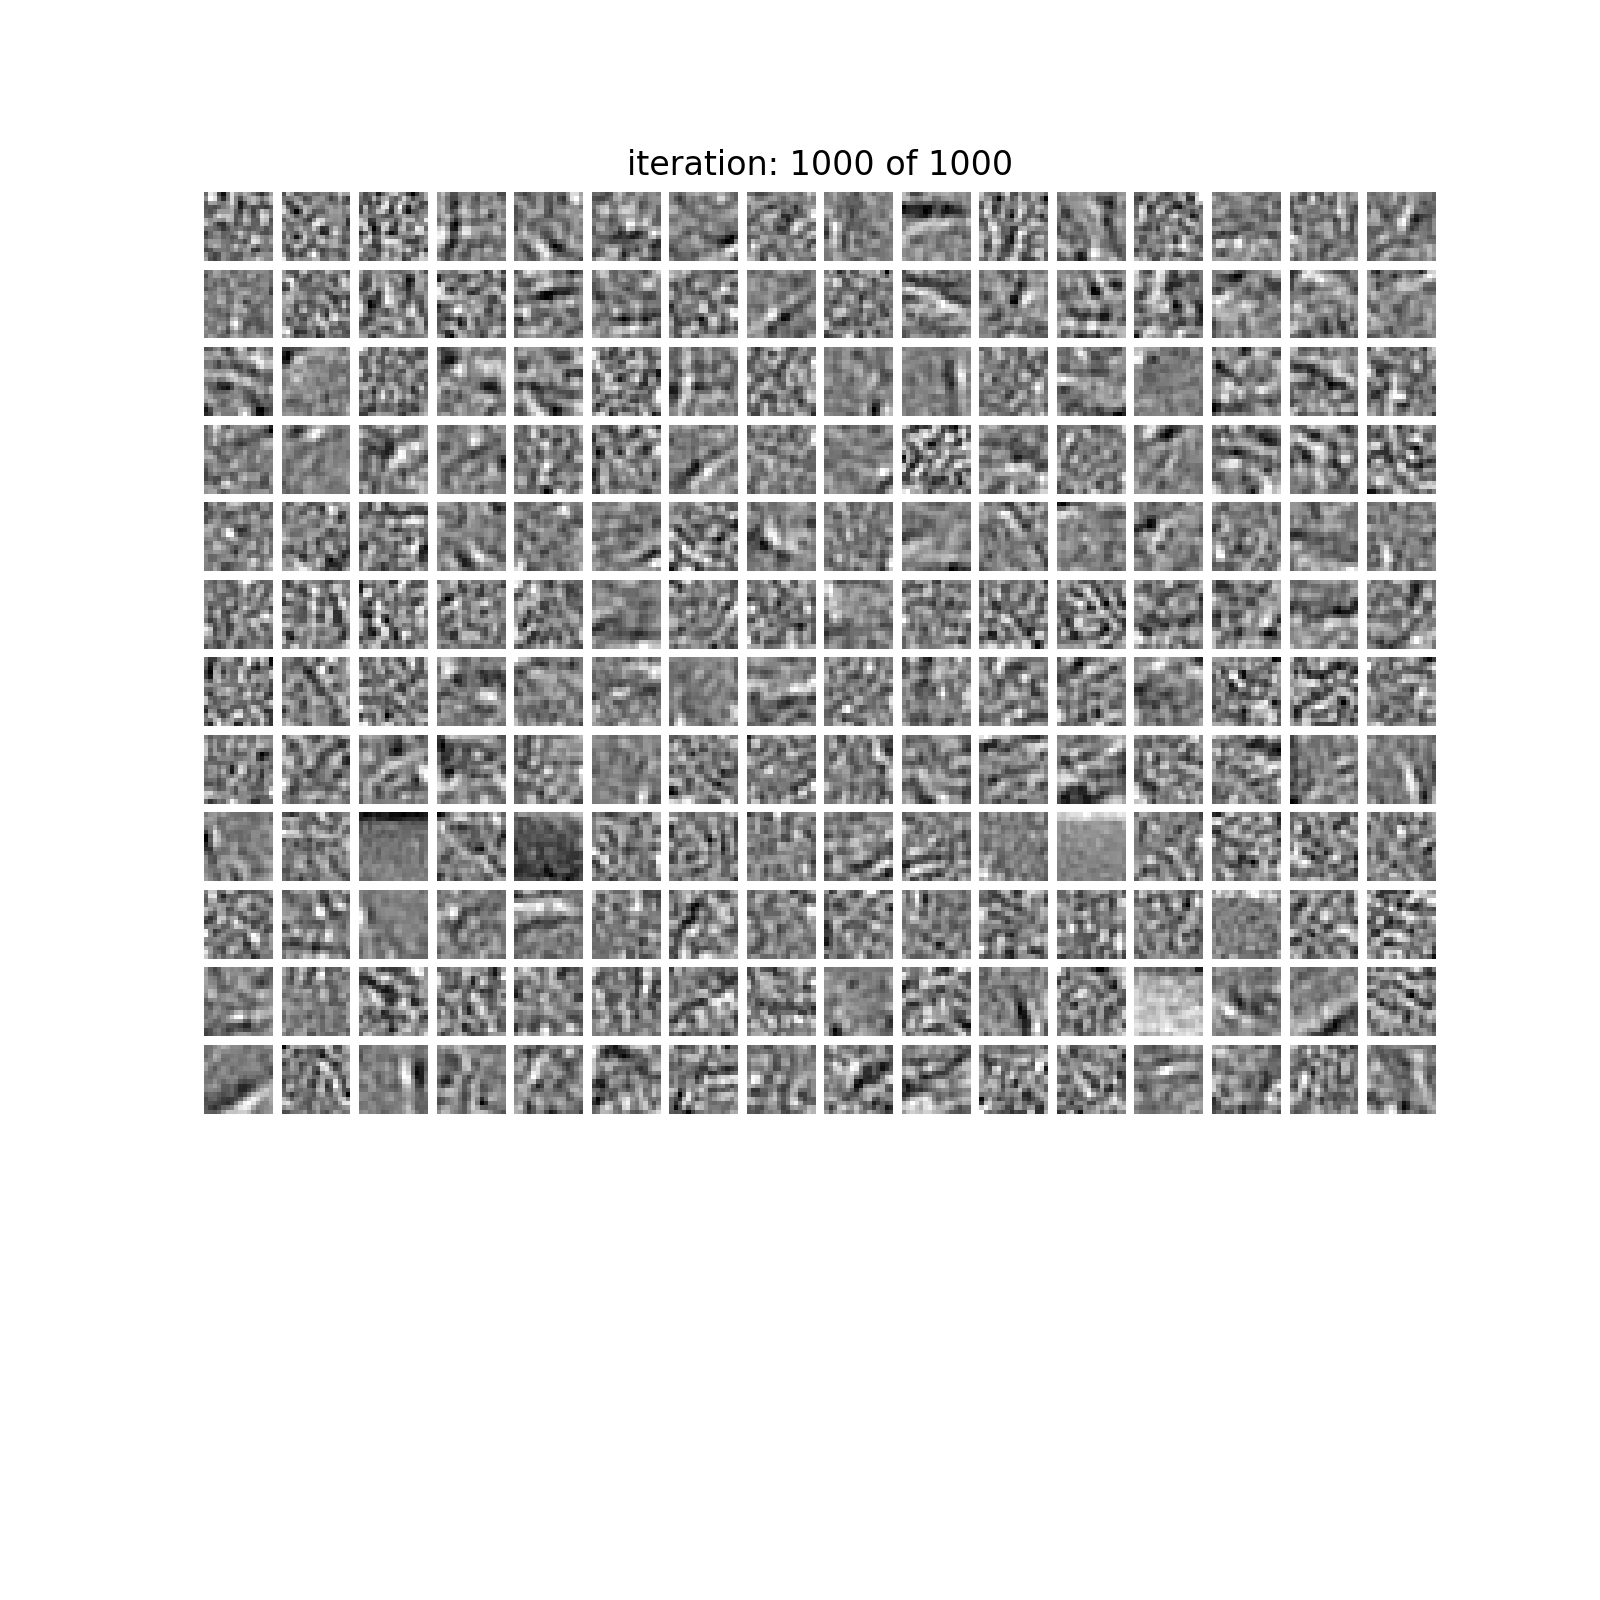

starting GPU run...
total time: 78.336451


<IPython.core.display.Javascript object>


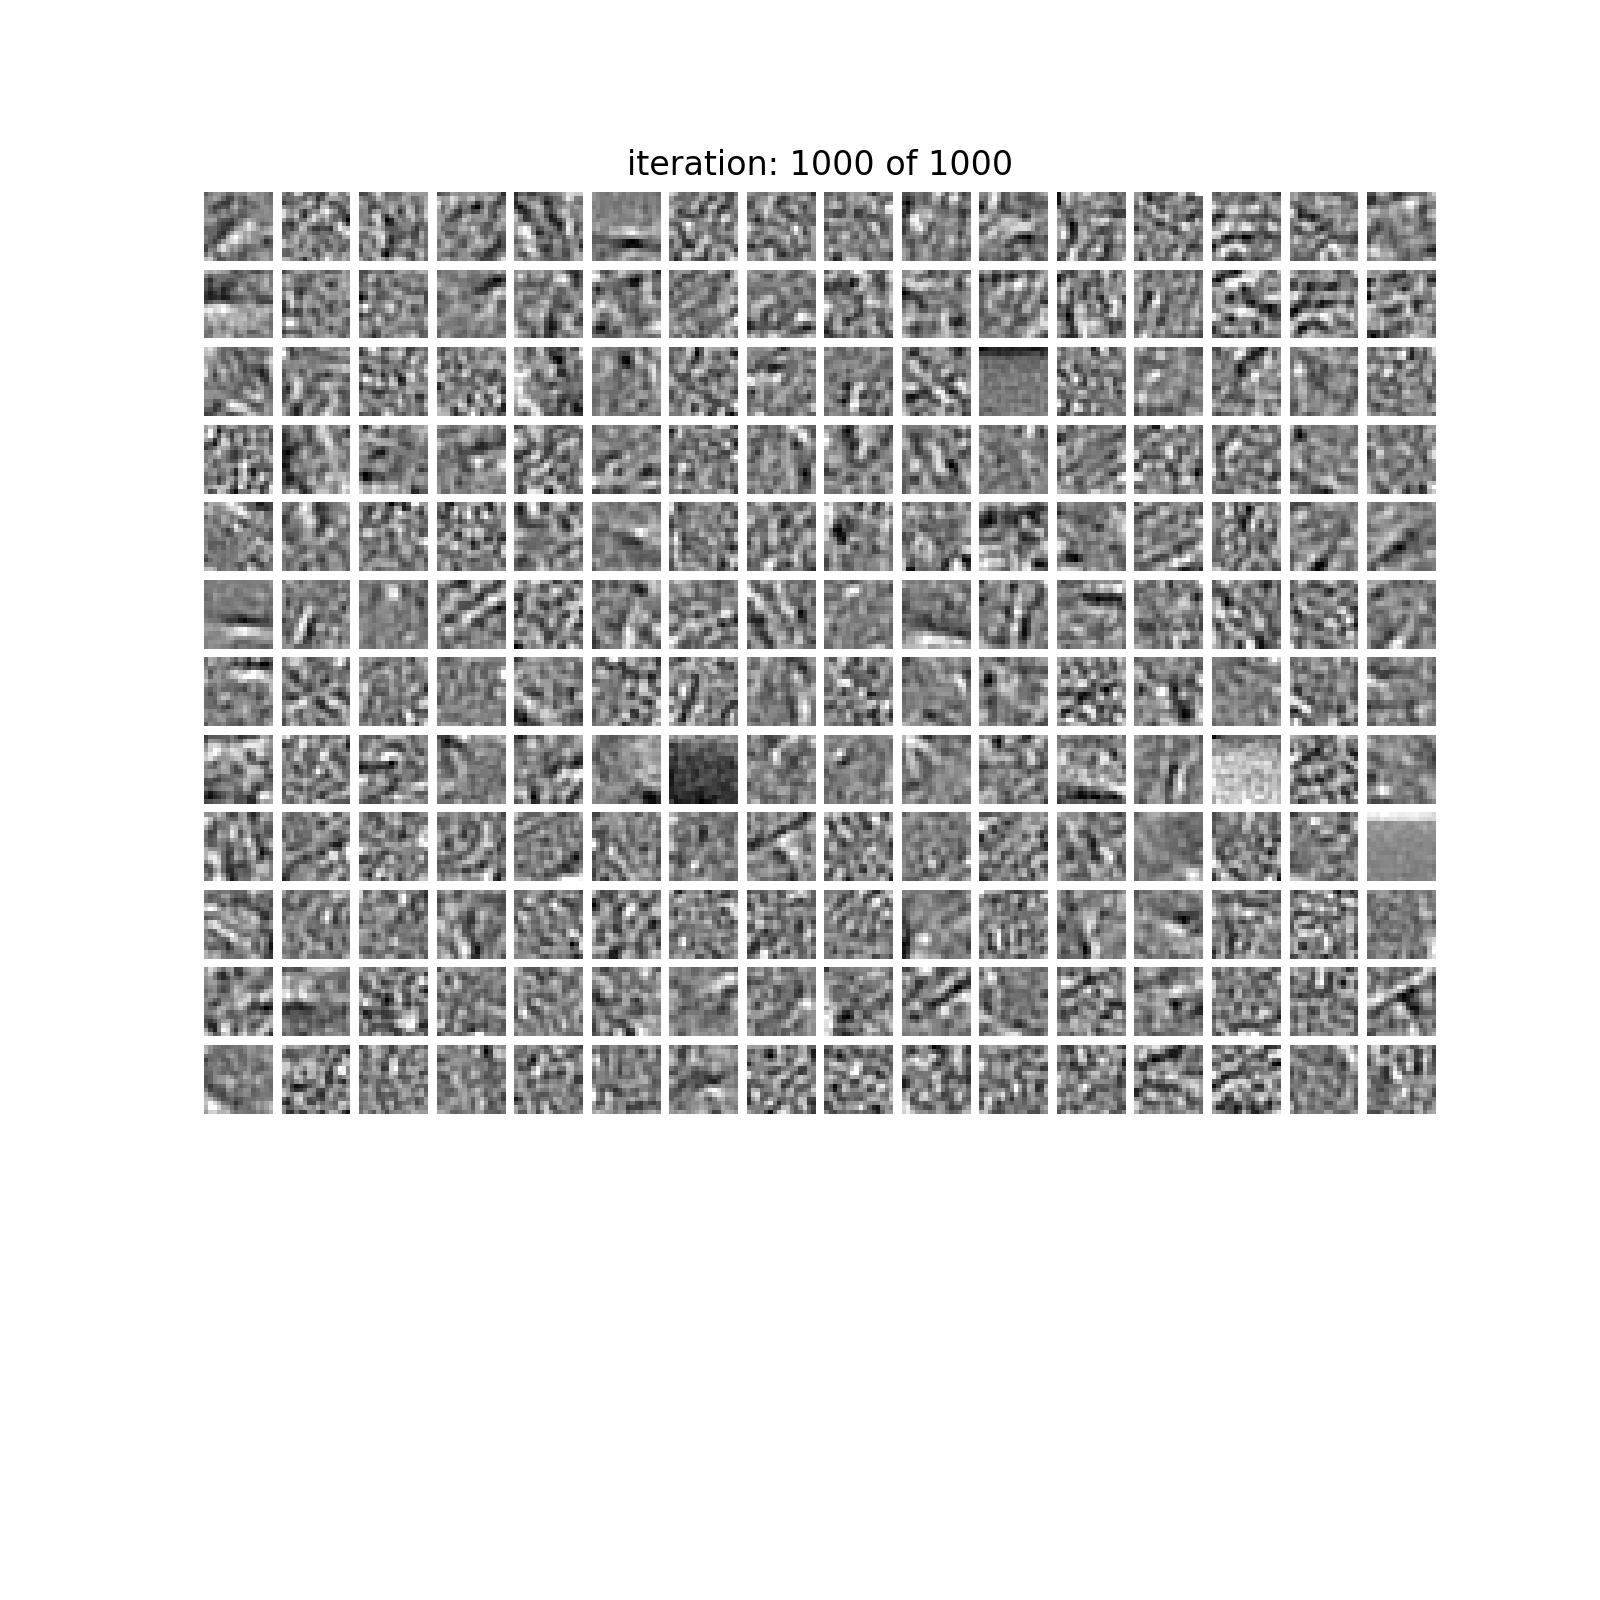

starting CPU run...
total time: 147.003641


In [9]:
%matplotlib notebook

n_basis   = 192
A_n_itr   = 500
lmbda     = 0.1
eta       = 1e-2
thresh    = 1e-2
nabla     = 1e-2

n_epoch   = 1000
montage_update_rate = 500

## ===========================
## GPU
device = torch.device('cuda')
model = sparsecoding(n_basis=n_basis,
                     n=patch_size**2,
                     lmbda=lmbda,
                     eta=eta,
                     thresh=thresh,
                     nabla=nabla,
                     n_itr=A_n_itr,
                     device=device
                    )
fig,ax = plotmontage(model)
print('starting GPU run...')
## start timer
t0 = time.time()
for i in range(n_epoch//montage_update_rate):
    # learn dictionary
    model.learndict(gpudataset,n_epoch=montage_update_rate,batch_size=batch_size)
    # update montage
    fig,ax = plotmontage(model,fig=fig,ax=ax,title='iteration: %d of %d'%(i*montage_update_rate+1,n_epoch))
## halt timer
t1 = time.time()
fig,ax = plotmontage(model,fig=fig,ax=ax,title='iteration: %d of %d'%(n_epoch,n_epoch))
print('total time: %f'%(t1-t0))

## ===========================
## CPU
device = torch.device('cpu')
model = sparsecoding(n_basis=n_basis,
                     n=patch_size**2,
                     lmbda=lmbda,
                     eta=eta,
                     thresh=thresh,
                     nabla=nabla,
                     n_itr=A_n_itr,
                     device=device
                    )
fig,ax = plotmontage(model)
print('starting CPU run...')
## start timer
t0 = time.time()
for i in range(n_epoch//montage_update_rate):
    # learn dictionary
    model.learndict(cpudataset,n_epoch=montage_update_rate,batch_size=batch_size)
    # update montage
    fig,ax = plotmontage(model,fig=fig,ax=ax,title='iteration: %d of %d'%(i*montage_update_rate+1,n_epoch))
## halt timer
t1 = time.time()
fig,ax = plotmontage(model,fig=fig,ax=ax,title='iteration: %d of %d'%(n_epoch,n_epoch))
print('total time: %f'%(t1-t0))

<IPython.core.display.Javascript object>


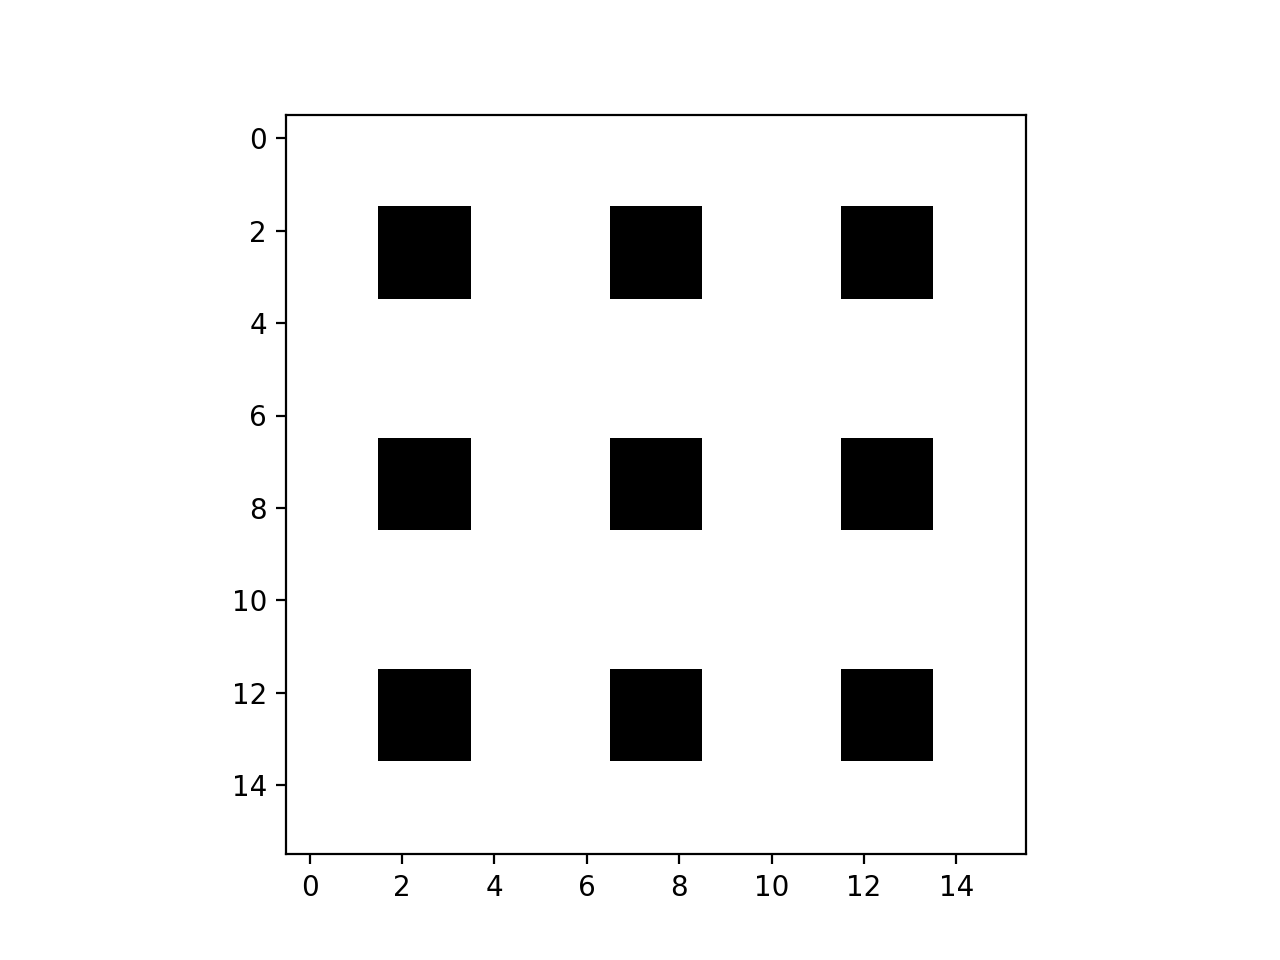

In [31]:
I = np.zeros([patch_size,patch_size])
idxs = np.array([0,1, 4,5,6, 9,10,11, 14,15])
I[idxs,:] = 1
I[:,idxs] = 1

fig,ax = plt.subplots()

ax.imshow(I,cmap="gray")

(1, 256)


<IPython.core.display.Javascript object>


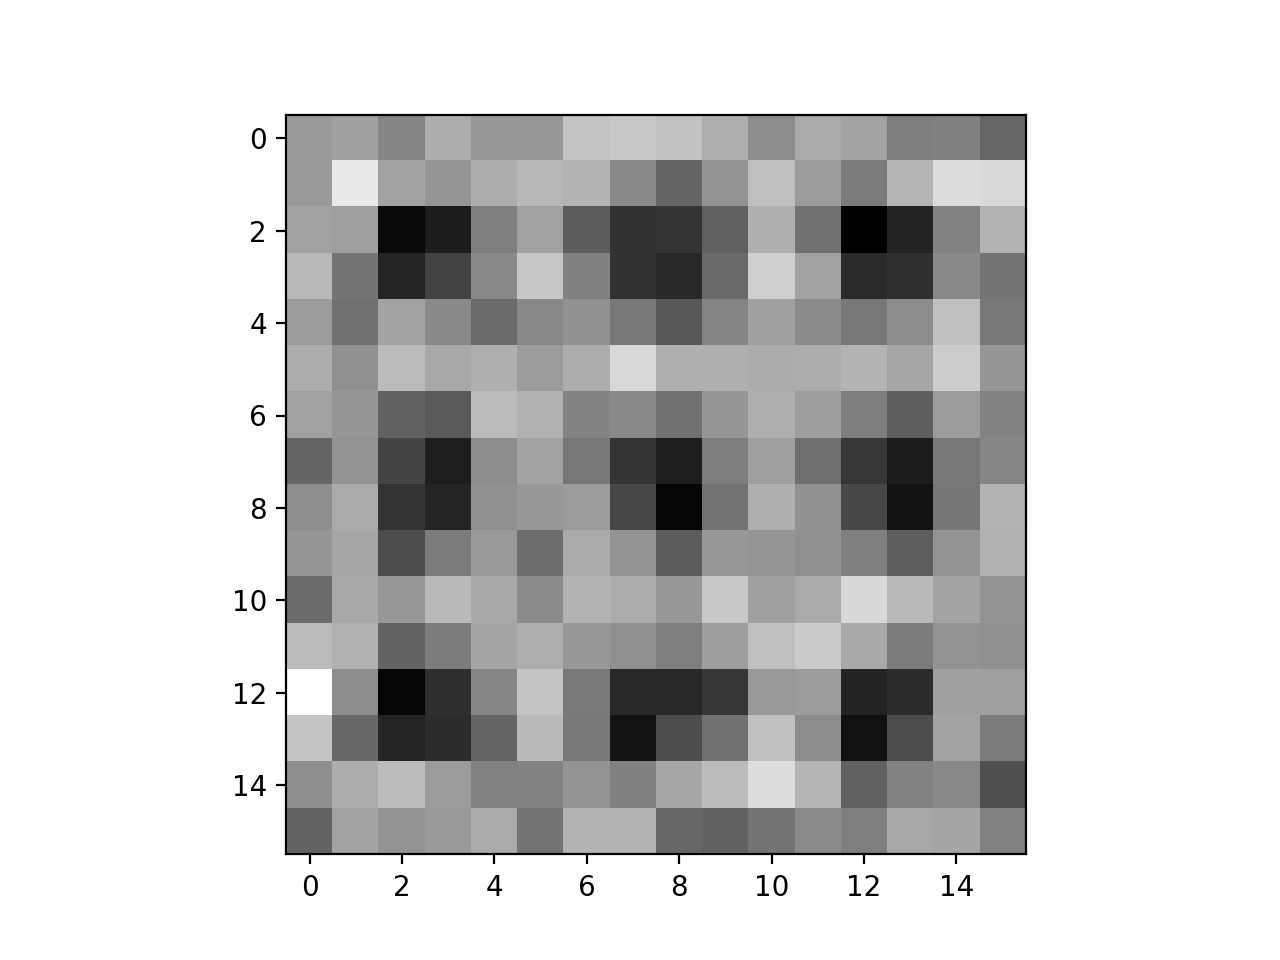

In [32]:
tI = torch.from_numpy(I.reshape([1,-1]).astype(np.float32)).to(device)

A = model.ista(tI)
Ihat = torch.mm(model.D,A.t()).t()
Ihat = Ihat.cpu().detach().numpy()
print(Ihat.shape)

fig,ax = plt.subplots()
ax.imshow(Ihat.reshape([patch_size,patch_size]),cmap="gray")

<IPython.core.display.Javascript object>


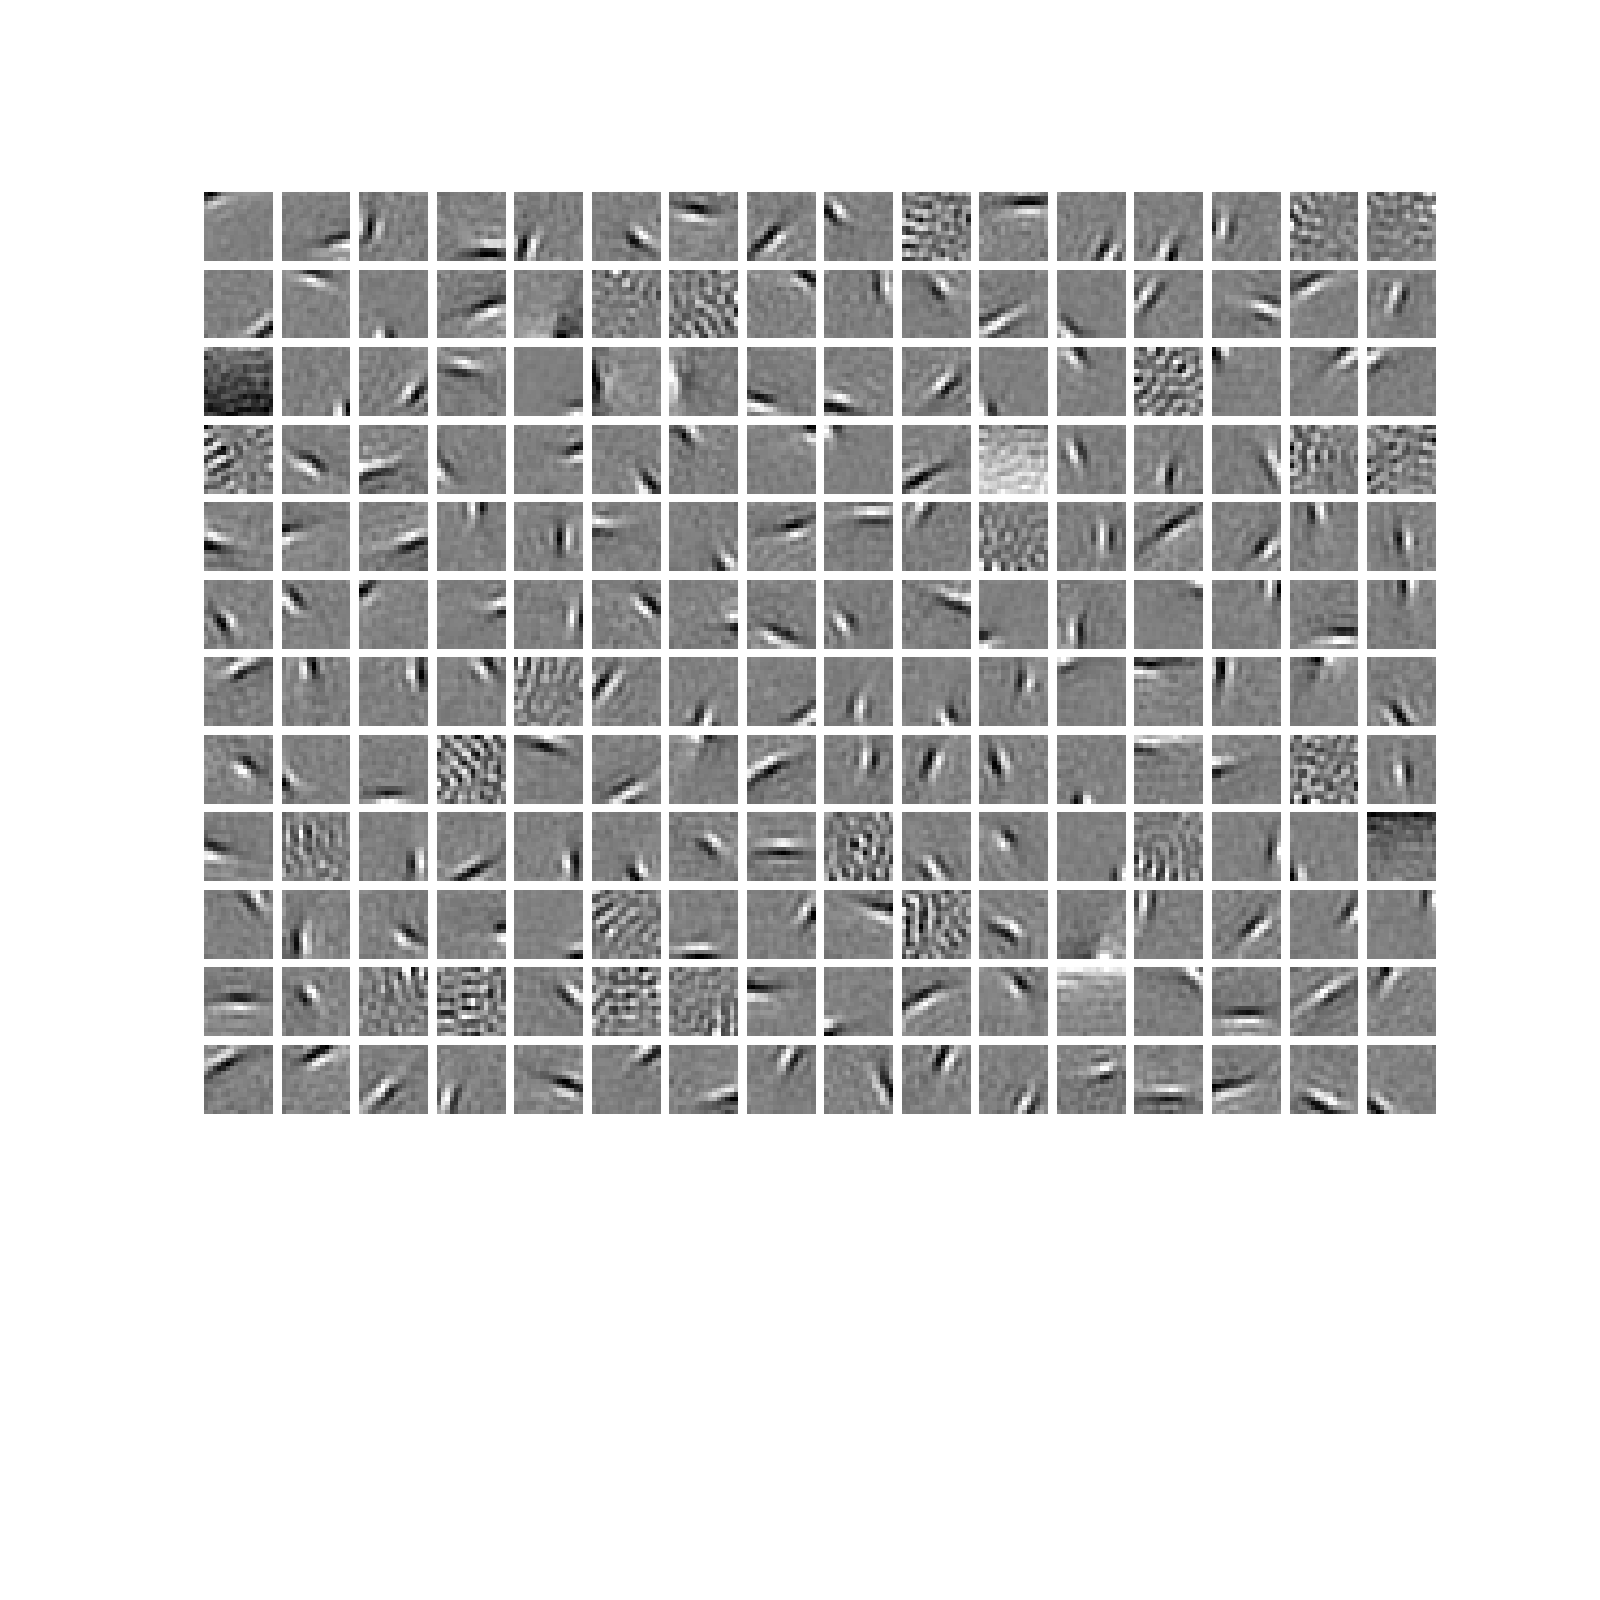

torch.float32


In [42]:
import pickle as pkl 

def loaddict(model,filename,device):
    '''
    Load dictionary from pkl dump
    ---
    filename - string
        file to load as self.D
    '''
    file = open(filename,'rb')
    nD = pkl.load(file)
    file.close()
    model.D = torch.tensor(nD.astype(np.float32)).to(device) 


def savedict(model,filename):
    '''
    Save dictionary to pkl dump
    ---
    filename - string
        file to save self.D to
    '''
    filehandler = open(filename,"wb")
    pkl.dump(model.D.cpu().detach().numpy(),filehandler)
    filehandler.close()

fname = "DICTIONARY.p"
savedict(model,fname)

testmodel = sparsecoding(n_basis=n_basis,
                     n=patch_size**2,
                     lmbda=lmbda,
                     eta=eta,
                     thresh=thresh,
                     nabla=nabla,
                     n_itr=A_n_itr,
                     device=device
                    )
loaddict(testmodel,fname,device)
fig,ax = plotmontage(testmodel)